In [1]:
!unzip /content/TimeGAN.zip -d ''
%cd TimeGAN

Archive:  /content/TimeGAN.zip
replace TimeGAN/__pycache__/base_model.cpython-37.pyc? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
/content/TimeGAN


In [27]:
!python main.py
#z.shape torch.Size([128, 24, 6])

(3661, 24, 6)
Preprocessing Complete!
Saved real data!
Start Embedding Network Training
step: 500/10000, loss_e: 0.023
step: 1000/10000, loss_e: 0.024
step: 1500/10000, loss_e: 0.017
step: 2000/10000, loss_e: 0.0148
step: 2500/10000, loss_e: 0.0126
step: 3000/10000, loss_e: 0.0109
step: 3500/10000, loss_e: 0.0107
step: 4000/10000, loss_e: 0.0102
step: 4500/10000, loss_e: 0.011
step: 5000/10000, loss_e: 0.0103
step: 5500/10000, loss_e: 0.0092
step: 6000/10000, loss_e: 0.0083
step: 6500/10000, loss_e: 0.007
step: 7000/10000, loss_e: 0.0052
step: 7500/10000, loss_e: 0.0051
step: 8000/10000, loss_e: 0.0037
step: 8500/10000, loss_e: 0.0034
step: 9000/10000, loss_e: 0.0045
step: 9500/10000, loss_e: 0.0032
step: 10000/10000, loss_e: 0.0037
Finish Embedding Network Training
Start Training with Supervised Loss Only
step: 500/10000, loss_s: 0.0159
step: 1000/10000, loss_s: 0.0077
step: 1500/10000, loss_s: 0.0058
step: 2000/10000, loss_s: 0.0048
step: 2500/10000, loss_s: 0.0039
step: 3000/10000, 

## Looking at the Synthetic Data

In [2]:
import numpy as np 

with open('data/stock_synthetic_data.npy', 'rb') as f:
    generated_data = np.load(f)

with open('data/stock_real_data.npy', 'rb') as f:
    ori_data = np.load(f)

print(ori_data.shape)
print(generated_data.shape)

In [4]:
from metrics.discriminative_metrics import discriminative_score_metrics
from metrics.predictive_metrics import predictive_score_metrics
from metrics.visualization_metrics import visualization

## Evaluate the generated data
### 1. Discriminative score
To evaluate the classification accuracy between original and synthetic data using post-hoc RNN network. The output is |classification accuracy - 0.5|.



*   metric_iteration: the number of iterations for metric computation.




In [5]:
metric_iteration = 5

discriminative_score = list()
for _ in range(metric_iteration):
  temp_disc = discriminative_score_metrics(ori_data, generated_data)
  discriminative_score.append(temp_disc)

print('Discriminative score: ' + str(np.round(np.mean(discriminative_score), 4)))

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


/content/TimeGAN/metrics/discriminative_metrics.py:81: UserWarning: `tf.nn.rnn_cell.GRUCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.GRUCell`, and will be replaced by that in Tensorflow 2.0.
  d_cell = tf1.nn.rnn_cell.GRUCell(num_units=hidden_dim, activation=tf.nn.tanh, name = 'd_cell')
/usr/local/lib/python3.7/dist-packages/keras/layers/legacy_rnn/rnn_cell_impl.py:573: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  initializer=self._kernel_initializer)
/usr/local/lib/python3.7/dist-packages/keras/layers/legacy_rnn/rnn_cell_impl.py:579: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  tf.compat.v1.constant_initializer(1.0, dtype=self.dtype)))
/usr/local/lib/python3.7/dist-packages/keras/layers/legacy_rnn/rnn_cell_impl.py:583: UserWarning: `layer.add_va

Instructions for updating:
Please use tf.global_variables instead.


/content/TimeGAN/metrics/discriminative_metrics.py:84: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  y_hat_logit = tf1.layers.dense(d_last_states, 1, activation=None)
/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/core.py:261: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)
/content/TimeGAN/metrics/discriminative_metrics.py:81: UserWarning: `tf.nn.rnn_cell.GRUCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.GRUCell`, and will be replaced by that in Tensorflow 2.0.
  d_cell = tf1.nn.rnn_cell.GRUCell(num_units=hidden_dim, activation=tf.nn.tanh, name = 'd_cell')
/usr/local/lib/python3.7/dist-packages/keras/layers/legacy_rnn/rnn_cell_impl.py:573: UserWarning: `layer.add_variable` is deprecated and will be removed in a future vers

Discriminative score: 0.0774


## Evaluate the generated data

###2. Predictive score
To evaluate the prediction performance on train on synthetic, test on real setting. More specifically, we use Post-hoc RNN architecture to predict one-step ahead and report the performance in terms of MAE.

In [ ]:
predictive_score = list()
for tt in range(metric_iteration):
  temp_pred = predictive_score_metrics(ori_data, generated_data)
  predictive_score.append(temp_pred)   
    
print('Predictive score: ' + str(np.round(np.mean(predictive_score), 4)))

### 3. Visualization

We visualize the original and synthetic data distributions using PCA and tSNE analysis.

(3661, 24, 6)
(3661, 24, 6)


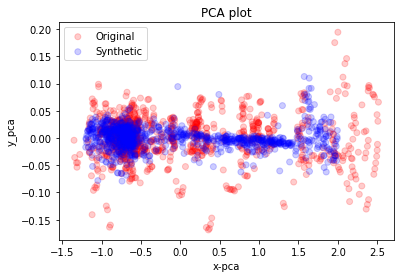

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.001s...
[t-SNE] Computed neighbors for 2000 samples in 0.130s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.028527
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.470787
[t-SNE] KL divergence after 300 iterations: 0.740553


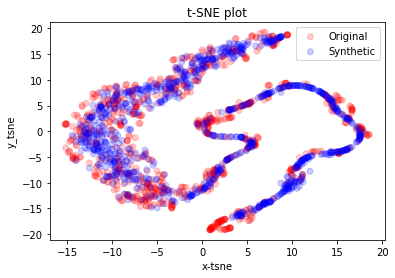

In [3]:
visualization(ori_data, generated_data, 'pca')
visualization(ori_data, generated_data, 'tsne')

In [7]:
!zip -r /content/timegan.zip /content/TimeGAN

  adding: content/TimeGAN/ (stored 0%)
  adding: content/TimeGAN/main.py (deflated 64%)
  adding: content/TimeGAN/metrics/ (stored 0%)
  adding: content/TimeGAN/metrics/visualization_metrics.py (deflated 65%)
  adding: content/TimeGAN/metrics/__init__.py (stored 0%)
  adding: content/TimeGAN/metrics/predictive_metrics.py (deflated 59%)
  adding: content/TimeGAN/metrics/discriminative_metrics.py (deflated 65%)
  adding: content/TimeGAN/metrics/__pycache__/ (stored 0%)
  adding: content/TimeGAN/metrics/__pycache__/data.cpython-37.pyc (deflated 44%)
  adding: content/TimeGAN/metrics/__pycache__/predictive_metrics.cpython-39.pyc (deflated 46%)
  adding: content/TimeGAN/metrics/__pycache__/visualization_metrics.cpython-37.pyc (deflated 45%)
  adding: content/TimeGAN/metrics/__pycache__/discriminative_metrics.cpython-39.pyc (deflated 43%)
  adding: content/TimeGAN/metrics/__pycache__/__init__.cpython-39.pyc (deflated 23%)
  adding: content/TimeGAN/metrics/__pycache__/data.cpython-39.pyc (def